In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df_mar = pd.read_csv('Austin March 2022 Airbnb Data.csv')
df_dec = pd.read_csv('Austin December 2021 Airbnb Data.csv')
df_sep = pd.read_csv('Austin September 2021 Airbnb Data.csv')   
df_jun = pd.read_csv('Austin June 2021 Airbnb Data.csv')
                  
df_mar.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,240,2,585,2022-03-07,3.69,1,305,42,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,42,1,264,2021-07-03,1.81,1,0,3,NaN
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021-07-01,0.78,1,0,2,NaN
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,325,3,268,2022-03-06,2.09,1,107,30,NaN
4,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,44,3,48,2021-11-13,0.33,1,26,2,NaN
5,13035,Historic house in highly walkable East Austin,50793,Molly,NaN,78702,30.26098,-97.73072,Entire home/apt,250,30,14,2022-01-31,0.10,2,207,2,NaN
6,21126,Quiet Mid Century Modern Retreat with Patio an...,80406,Dani,NaN,78704,30.24417,-97.73988,Entire home/apt,417,1,137,2022-02-14,1.24,12,122,22,NaN
7,22166,Close in Hill country views NW,84906,Stacey,NaN,78759,30.38794,-97.76358,Entire home/apt,153,30,11,2021-01-10,0.08,1,255,0,NaN
8,22828,Garage Apartment near S Congress,56488,David,NaN,78741,30.23614,-97.73225,Entire home/apt,58,31,46,2022-01-25,0.31,1,99,6,NaN
9,40285,"OUTDOOR LIVING IN AUSTIN, TX",170787,Robbie,NaN,78731,30.35123,-97.76207,Entire home/apt,350,2,34,2022-01-20,0.25,1,302,4,NaN


In [2]:
mar_cols = df_mar.columns
dec_cols = df_dec.columns
jun_cols = df_jun.columns
sep_cols = df_sep.columns

# What variables are in the data and are they the same in each data set
print(mar_cols)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [3]:
# The variables in March 2022 are the same as December 2021
mar_cols == dec_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
# The variables in March 2022 are not the same as June 2021
mar_cols == jun_cols

ValueError: Lengths must match to compare

In [5]:
# The June data does not have 'number_of_reviews_ltm' and 'license'
print(jun_cols)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [6]:
# The variables in March 2022 are the same as September 2021
mar_cols == sep_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## The CRISP-DM Process

- Business Understanding
- Data Understanding
- Data Preparation
- Data Modeling
- Evaluation
- Deployment

# Business Understanding

### If you were looking for a sound investment property to rent on Airbnb in Austin, where should you look?
- Which neighborhoods have the highest average price to rent?
- Which neighborhoods have the most hosts
- What room type rents for the most?

# Data Understanding
- id (integer) - Airbnb's unique identifier for the listing
- name (text) -	Name of the listing
- host_id (integer) - Airbnb's unique identifier for the host/user
- host_name (text) - Name of the host. Usually just the first name(s).
- neighbourhood_group (text) - The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
- neighbourhood (text) - The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
- latitude (numeric) - Uses the World Geodetic System (WGS84) projection for latitude and longitude.
- longitude	(numeric) -	Uses the World Geodetic System (WGS84) projection for latitude and longitude.
- room_type	(text) - Entire home/apt | Private room | Shared room | Hotel
- price	(integer) - daily price in local currency
- minimum_nights (integer) - minimum number of night stay for the listing (calendar rules may be different)
- number_of_reviews (integer) -	The number of reviews the listing has
- last_review (date) - The date of the last/newest review
- reviews_per_month	(numeric) - The number of reviews the listing has over the lifetime of the listing
- calculated_host_listings_count (integer) - The number of listings the host has in the current scrape, in the city/region geography.
- availability_365 (integer) - The availability of the listing 365 days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.
- number_of_reviews_ltm	(integer) - The number of reviews the listing has (in the last 12 months)
- license (text) - The licence/permit/registration number

In [7]:
# Add 'Month' column to differentiate data sets
df_mar['Month'] = 'March'
df_dec['Month'] = 'December'
df_jun['Month'] = 'June'
df_sep['Month'] = 'September'

# Combine the dataframes
df = pd.concat([df_mar, df_dec, df_jun, df_sep], axis=0)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Month
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,240,2,585,2022-03-07,3.69,1,305,42.0,NaN,March
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,42,1,264,2021-07-03,1.81,1,0,3.0,NaN,March
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021-07-01,0.78,1,0,2.0,NaN,March
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,325,3,268,2022-03-06,2.09,1,107,30.0,NaN,March
4,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,44,3,48,2021-11-13,0.33,1,26,2.0,NaN,March


In [8]:
print("The March 2022 data has {} rows and {} columns.".format(df_mar.shape[0],df_mar.shape[1]))
print("The December 2021 data has {} rows and {} columns.".format(df_dec.shape[0],df_dec.shape[1]))
print("The June 2021 data has {} rows and {} columns.".format(df_jun.shape[0],df_jun.shape[1]))
print("The September 2021 data has {} rows and {} columns.".format(df_sep.shape[0],df_sep.shape[1]))
print("The combined data has {} rows and {} columns.".format(df.shape[0],df.shape[1]))

The March 2022 data has 11972 rows and 19 columns.
The December 2021 data has 11374 rows and 19 columns.
The June 2021 data has 10045 rows and 17 columns.
The September 2021 data has 10809 rows and 19 columns.
The combined data has 44200 rows and 19 columns.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44200 entries, 0 to 10808
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44200 non-null  int64  
 1   name                            44200 non-null  object 
 2   host_id                         44200 non-null  int64  
 3   host_name                       44085 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   44200 non-null  int64  
 6   latitude                        44200 non-null  float64
 7   longitude                       44200 non-null  float64
 8   room_type                       44200 non-null  object 
 9   price                           44200 non-null  int64  
 10  minimum_nights                  44200 non-null  int64  
 11  number_of_reviews               44200 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.420000e+04,4.420000e+04,0.0,44200.000000,44200.000000,44200.000000,44200.000000,44200.000000,44200.000000,33731.000000,44200.000000,44200.000000,34155.000000,0.0
mean,1.327670e+16,1.071942e+08,NaN,78723.846765,30.281543,-97.751975,290.320905,8.259140,33.496448,2.011137,15.978054,126.210204,9.193647,NaN
std,8.539355e+16,1.223210e+08,NaN,20.973376,0.061868,0.060783,525.631020,25.950715,71.659745,5.579843,51.198718,135.809507,18.122097,NaN
min,1.078000e+03,2.300000e+01,NaN,78701.000000,30.078870,-98.070940,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.684231e+07,1.219223e+07,NaN,78704.000000,30.244350,-97.769483,98.000000,1.000000,1.000000,0.210000,1.000000,0.000000,0.000000,NaN
50%,3.263905e+07,5.146372e+07,NaN,78723.000000,30.269786,-97.743480,163.000000,2.000000,6.000000,0.900000,1.000000,72.000000,1.000000,NaN
75%,4.771806e+07,1.658413e+08,NaN,78745.000000,30.307130,-97.719605,300.000000,3.000000,31.000000,2.290000,4.000000,260.000000,11.000000,NaN
max,5.805900e+17,4.489213e+08,NaN,78759.000000,30.518780,-97.560620,20000.000000,1100.000000,1000.000000,339.000000,338.000000,365.000000,431.000000,NaN


#### Quality - issues with the content
- neighbourhood_group and license are missing completely
- number_of_reviews_ltm is missing for all records from June 2021
- last_review is identified as text instead of a date
- id, host_id, and neighbourhood are identified as integers instead of text
- last_review and reviews_per_month are missing 10,469 records (23.69%)
- 115 records are null for host_name 
- Hotels are very rare in the data


#### Tidiness - issues with the structure (Each variable must have its own column. Each observation must have its own row. Each value must have its own cell.)
- N/A

## Data Preparation

In [11]:
# Make a copy of the original data
df_clean = df.copy()

### Issue #1: neighbourhood_group and license are missing completely

#### Define
Drop these columns neighbourhood_group and license

#### Code

In [12]:
# neighbourhood_group and license are missing completely so we will drop these columns
print(df_clean.shape)
df_clean.drop(columns=['neighbourhood_group', 'license'],inplace=True)

(44200, 19)


#### Test

In [13]:
# The number of columns should decrease by two
df_clean.shape

(44200, 17)

### Issue #2: number_of_reviews_ltm is missing for all records from June 2021

#### Define
Drop number_of_reviews_ltm 

#### Code

In [14]:
# number_of_reviews_ltm is missing for all records from June 2021 so this column will be dropped
df_clean.drop(columns=['number_of_reviews_ltm'],inplace=True)

#### Test

In [15]:
# The number of columns should decrease by one
df_clean.shape

(44200, 16)

### Issue #3: last_review is identified as text instead of a date

#### Define
Change "last_review" to a date type

#### Code

In [16]:
#change variable to a date
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])

#### Test

In [17]:
# Verify last_review is a datetime variable
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44200 entries, 0 to 10808
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              44200 non-null  int64         
 1   name                            44200 non-null  object        
 2   host_id                         44200 non-null  int64         
 3   host_name                       44085 non-null  object        
 4   neighbourhood                   44200 non-null  int64         
 5   latitude                        44200 non-null  float64       
 6   longitude                       44200 non-null  float64       
 7   room_type                       44200 non-null  object        
 8   price                           44200 non-null  int64         
 9   minimum_nights                  44200 non-null  int64         
 10  number_of_reviews               44200 non-null  int64         
 11  la

### Issue #4: id, host_id, and neighbourhood are identified as integers instead of text

#### Define
Change id, host_id, and neighbourhood to text

#### Code

In [18]:
# Change variables to objects
df_clean['id'] = df_clean['id'].apply(str)
df_clean['host_id'] = df_clean['host_id'].apply(str)
df_clean['neighbourhood'] = df_clean['neighbourhood'].apply(str)

#### Test

In [19]:
# Verify variables are now objects
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44200 entries, 0 to 10808
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              44200 non-null  object        
 1   name                            44200 non-null  object        
 2   host_id                         44200 non-null  object        
 3   host_name                       44085 non-null  object        
 4   neighbourhood                   44200 non-null  object        
 5   latitude                        44200 non-null  float64       
 6   longitude                       44200 non-null  float64       
 7   room_type                       44200 non-null  object        
 8   price                           44200 non-null  int64         
 9   minimum_nights                  44200 non-null  int64         
 10  number_of_reviews               44200 non-null  int64         
 11  la

### Issue #5: last_review and reviews_per_month are missing 10,469 records (23.69%)

#### Define
With missing almost 25% of values, last_review and reviews_per_month are not import to the questions and will be dropped

#### Code

In [20]:
# last_review and reviews_per_month are not import to the question and will be dropped
df_clean.drop(columns=['last_review', 'reviews_per_month'],inplace=True)

#### Test

In [21]:
# The number of columns should decrease by two
df_clean.shape

(44200, 14)

### Issue #6: 115 records are null for host_name

#### Define
I can't imagine the name of the host having any impact on answering the questions. host_name will be dropped.

#### Code

In [22]:
# The host_name has no impact of the listing or rental. This column will be dropped
df_clean.drop(columns=['host_name'],inplace=True)

#### Test

In [23]:
# The number of columns should decrease by one
df_clean.shape

(44200, 13)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44200 entries, 0 to 10808
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44200 non-null  object 
 1   name                            44200 non-null  object 
 2   host_id                         44200 non-null  object 
 3   neighbourhood                   44200 non-null  object 
 4   latitude                        44200 non-null  float64
 5   longitude                       44200 non-null  float64
 6   room_type                       44200 non-null  object 
 7   price                           44200 non-null  int64  
 8   minimum_nights                  44200 non-null  int64  
 9   number_of_reviews               44200 non-null  int64  
 10  calculated_host_listings_count  44200 non-null  int64  
 11  availability_365                44200 non-null  int64  
 12  Month                           

In [25]:
df_clean.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,44200.000000,44200.000000,44200.000000,44200.000000,44200.000000,44200.000000,44200.000000
mean,30.281543,-97.751975,290.320905,8.259140,33.496448,15.978054,126.210204
std,0.061868,0.060783,525.631020,25.950715,71.659745,51.198718,135.809507
min,30.078870,-98.070940,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.244350,-97.769483,98.000000,1.000000,1.000000,1.000000,0.000000
50%,30.269786,-97.743480,163.000000,2.000000,6.000000,1.000000,72.000000
75%,30.307130,-97.719605,300.000000,3.000000,31.000000,4.000000,260.000000
max,30.518780,-97.560620,20000.000000,1100.000000,1000.000000,338.000000,365.000000


In [26]:
pd.crosstab(index=df_clean['neighbourhood'], columns=df_clean['room_type'])

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
78701,2756,23,255,16
78702,4922,0,725,5
78703,1860,0,202,8
78704,6652,4,760,26
78705,1402,0,450,58
78712,0,0,4,0
78717,123,0,112,0
78719,22,0,8,0
78721,788,0,162,12


### Issue #7: Hotels are very rare in the data

#### Define
Exploring the data, it appears the rates for hotels are much higher than other room types and technically are not the type of property the average person would own. As seen above, over half of the hotel listings fall in one zip code. This will clearly introduce bias and does not help us answer the questions of interest so the hotel records will be removed.

#### Code

In [30]:
df_clean = df_clean[df_clean['room_type'] != "Hotel room"]

#### Test

In [31]:
df_clean['room_type'].value_counts()

Entire home/apt    35635
Private room        8044
Shared room          478
Name: room_type, dtype: int64

## Which neighborhoods have the highest average price to rent?

In [32]:
# Get mean by subgroup
# Get the average price by neighbourhood
price_neighbourhood = df_clean[['neighbourhood', 'price']]
neighbourhood_price = price_neighbourhood.groupby('neighbourhood', as_index=False).mean().sort_values(by='price', ascending=False)
neighbourhood_price

,neighbourhood,price
17,78730,910.571429
20,78733,893.927586
19,78732,854.262745
31,78746,671.018537
5,78712,500.000000
24,78737,459.635271
21,78734,428.975050
2,78703,424.758937
25,78738,400.549763
26,78739,353.928571


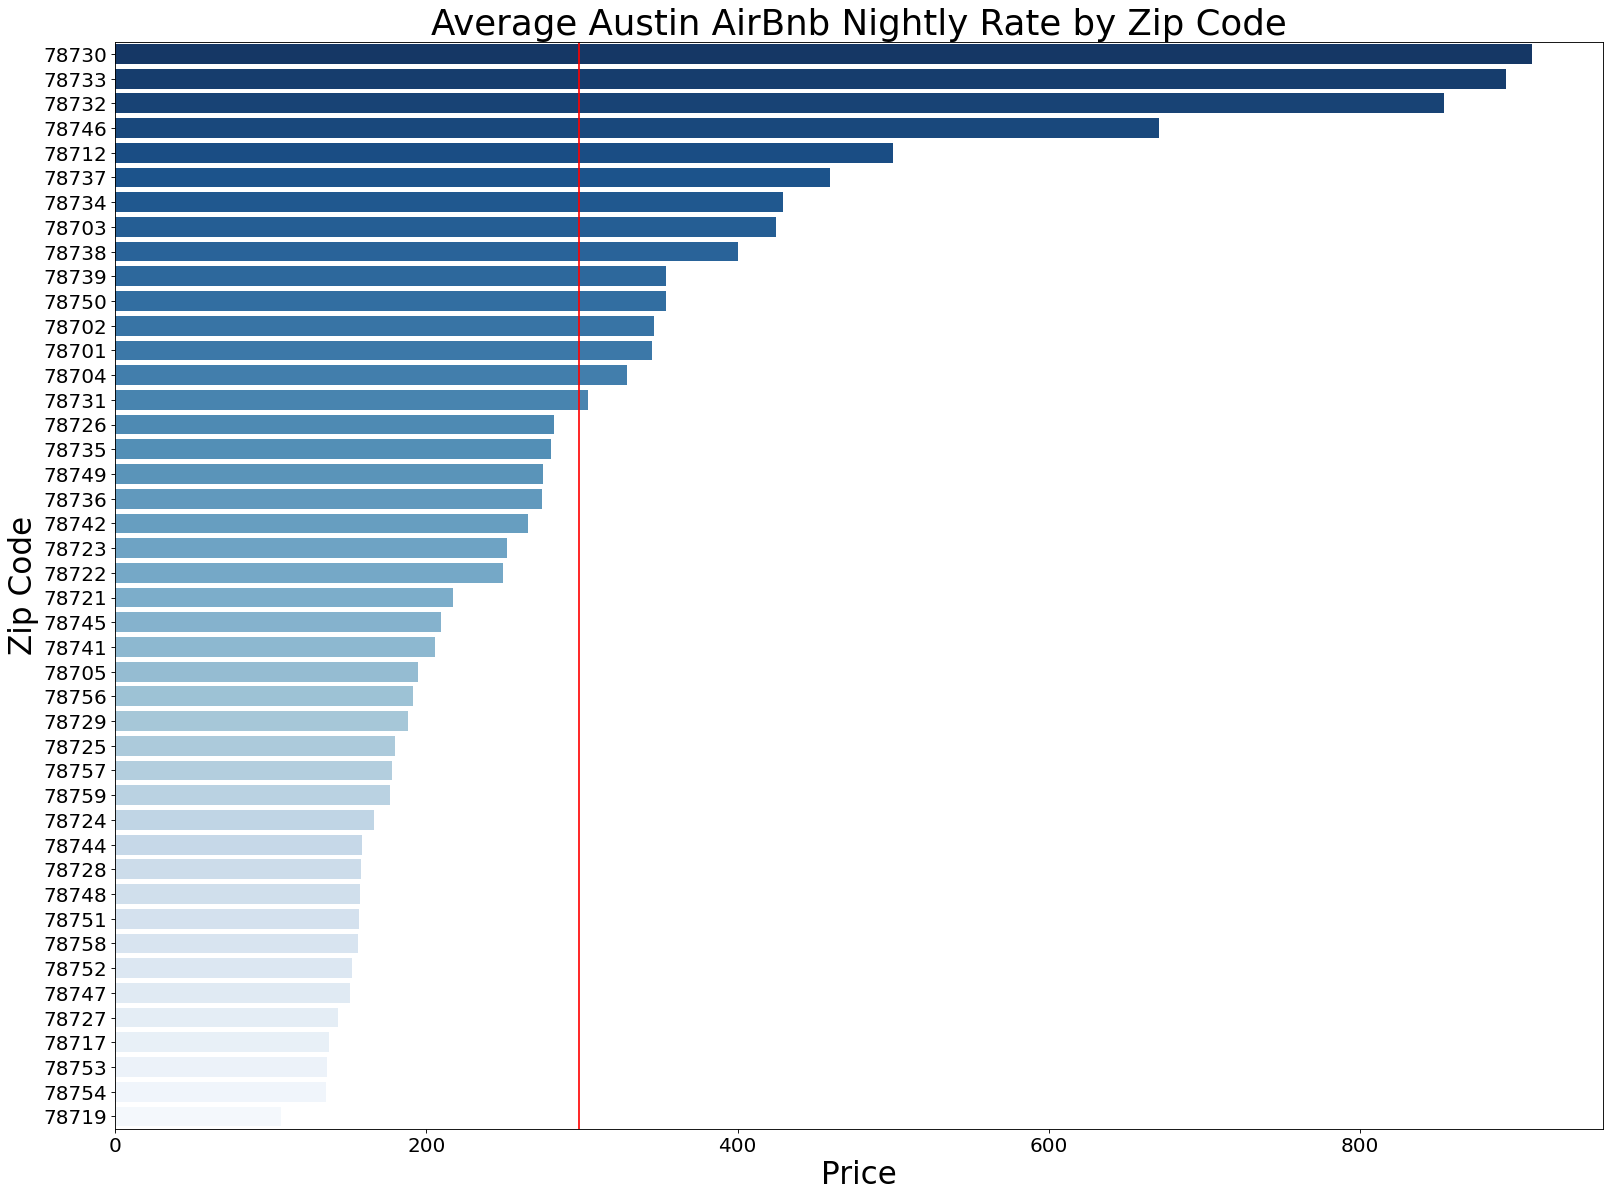

In [49]:
# barplot
from matplotlib.pyplot import figure
figure(figsize=(24, 18), dpi=80)

sns.barplot(y="neighbourhood", x="price", data=neighbourhood_price, palette='Blues_r');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel("Price", fontsize=28);
plt.ylabel("Zip Code", fontsize=28);
plt.axvline(x=neighbourhood_price.price.mean(), color='r', linestyle='-')
plt.title("Average Austin AirBnb Nightly Rate by Zip Code", fontsize=32);

## Which neighborhood has the most hosts?

In [34]:
#count unique 'host_id' values, grouped by neighbourhood
neighborhood_hosts = df_clean.groupby('neighbourhood', as_index=False)['host_id'].nunique()
neighborhood_hosts.rename(columns={"host_id": "Hosts"})
neighborhood_hosts = neighborhood_hosts.sort_values(by='host_id',ascending=False)

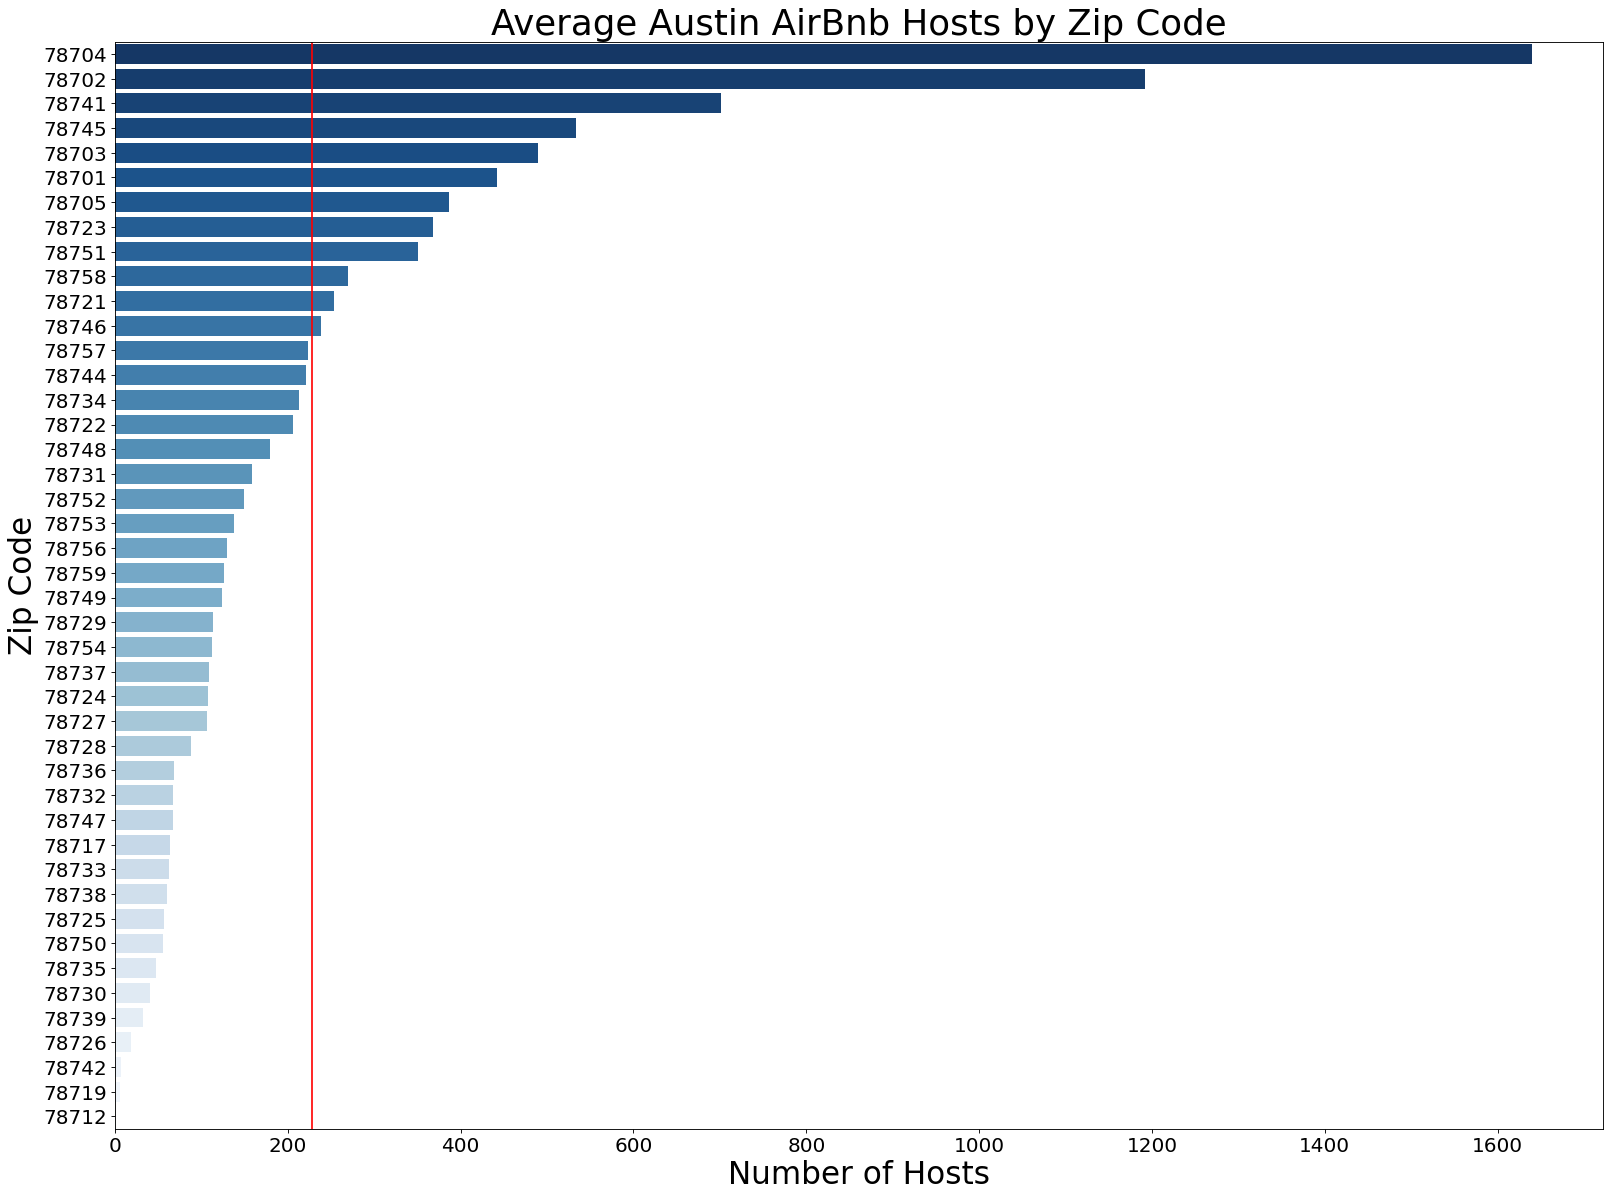

In [50]:
# barplot
from matplotlib.pyplot import figure
figure(figsize=(24, 18), dpi=80)

sns.barplot(y="neighbourhood", x="host_id", data=neighborhood_hosts, palette='Blues_r');
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.xlabel("Number of Hosts", fontsize=28);
plt.ylabel("Zip Code", fontsize=28);
plt.axvline(x=neighborhood_hosts.host_id.mean(), color='r', linestyle='-')
plt.title("Average Austin AirBnb Hosts by Zip Code", fontsize=32);

## What room type rents for the most?

In [36]:
# Get mean by subgroup
# Get the average price by neighbourhood
price_room = df_clean[['room_type', 'price']]
room_price = price_room.groupby('room_type', as_index=False).mean().sort_values(by='price', ascending=False)
room_price

,room_type,price
0,Entire home/apt,329.336074
1,Private room,129.021507
2,Shared room,67.615063


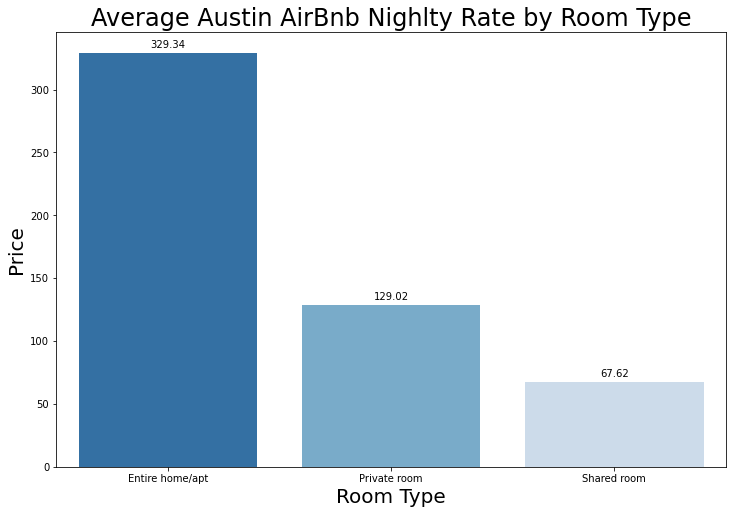

In [56]:
# Defining the plot size
plt.figure(figsize=(12, 8))

plots = sns.barplot(x="room_type", y="price", data=room_price, palette='Blues_r')

# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Room Type", fontsize=20);
plt.ylabel("Price", fontsize=20);
plt.title("Average Austin AirBnb Nighlty Rate by Room Type", fontsize=24);

## Create Dummy Variables for Categorical Variables
- After creating the dummy variables, drop the original variables

In [38]:
#df_cat = df_clean.select_dtypes(include=['object']).copy()
#df_cat.columns

month_dummy = pd.get_dummies(df_clean['Month'])
room_type_dummy = pd.get_dummies(df_clean['room_type'])
neighbourhood_dummy = pd.get_dummies(df_clean['neighbourhood'])

df_clean = pd.concat([df_clean, month_dummy, room_type_dummy, neighbourhood_dummy], axis=1)
df_clean.drop(columns=['Month','room_type','neighbourhood'],inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44157 entries, 0 to 10808
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              44157 non-null  object 
 1   name                            44157 non-null  object 
 2   host_id                         44157 non-null  object 
 3   latitude                        44157 non-null  float64
 4   longitude                       44157 non-null  float64
 5   price                           44157 non-null  int64  
 6   minimum_nights                  44157 non-null  int64  
 7   number_of_reviews               44157 non-null  int64  
 8   calculated_host_listings_count  44157 non-null  int64  
 9   availability_365                44157 non-null  int64  
 10  December                        44157 non-null  uint8  
 11  June                            44157 non-null  uint8  
 12  March                           

## Take another look at the Numerical Variables
- Create a variable for the lenght of the listing and drop the original variable
- Drop id, host_id, latitude, and longitude as these variables/values will be so nique and will not provide our model much info
- minumum_nights, number_of_reviews, calculated_host_listings_count, and availability_365 should not tell us much but the variables will be kept for now

In [39]:
df_clean['name_length'] = df_clean['name'].map(str).apply(len)
df_clean.drop(columns=['name', 'id','host_id','latitude','longitude'],inplace=True)
df_clean

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,December,June,March,September,Entire home/apt,...,78750,78751,78752,78753,78754,78756,78757,78758,78759,name_length
0,240,2,585,1,305,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,41
1,42,1,264,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14
2,109,3,117,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,29
3,325,3,268,1,107,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,50
4,44,3,48,1,26,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10804,112,2,0,4,326,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,31
10805,349,7,0,3,72,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,49
10806,349,7,0,3,69,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,49
10807,214,31,0,42,358,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,36


## Data Modeling

In [40]:
#Split into explanatory and response variables
X = df_clean.drop(['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'name_length'], axis=1)
y = df_clean['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

## Evaluation

In [41]:
#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.07938432781075588.  The rsquared on the test data was 0.07599225862717363.
